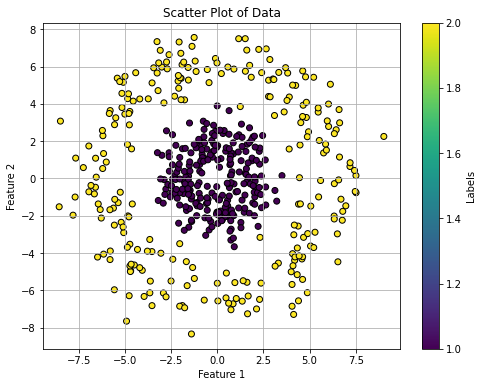

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Reading of file
csv_file = pd.read_csv() # Insert CSV file here
X = csv_file[range(0,2)]
y = csv_file[2]

# Convert to numpy
X = X.to_numpy()
y = y.to_numpy()
y = np.reshape(y, (-1, 1))

# Plotting the graph initially
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Labels')
plt.grid(True)
plt.show()


In [2]:
# Function for Gaussian kernel
def gaussian_kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x - y)**2 / (2 * (sigma ** 2)))

# Function to obtain gram matrix K
def gram_matrix(X, sigma):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = gaussian_kernel(X[i], X[j], sigma)
    return K

# Function to centralise gram matrix K
def center_gram_matrix(K):
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    centered_K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return centered_K

# Function to execute kernal PCA without the kPCA library
def kernel_pca(X, n_components, sigma):
    # Step 1: Compute Gaussian Kernel Matrix
    K = gram_matrix(X, sigma)
    
    # Step 2: Center the Kernel Matrix\
    centered_K = center_gram_matrix(K)
    
    # Step 3: Eigenvalue Decomposition
    eig_values, eig_vectors = np.linalg.eigh(centered_K)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eig_values)[::-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:, idx]
    
    # Take top eigenvalues and corresponding eigenvectors
    top_eig_values = eig_values[:n_components]
    top_eig_vectors = eig_vectors[:, :n_components]
    
    # Compute square root of top eigenvalues
    sqrt_eig_values = np.sqrt(top_eig_values)
    
    # Create a diagonal matrix with square root of top eigenvalues
    eig_values_sqrt_diag = np.diag(sqrt_eig_values)
    
    # Projecting the centered data onto the principal components
    projected_data = np.dot(top_eig_vectors, eig_values_sqrt_diag)
    
    return projected_data

In [3]:
# Function to obtain decision stump that has 100% accuracy in linear separation of data and tuning hyperparameter in the process
def search_for_decision_stump(n_components, sigma):
    transformed_data = kernel_pca(X, n_components, sigma)
    best_threshold = None
    best_accuracy = 0
    perfect_accuracy_count = 0  # Initialize count for perfect accuracy

    print(f"For Sigma = {sigma},")

    # Iterate through threshold values for each column
    for i in range(transformed_data.shape[1]):
        best_threshold_col = None
        best_accuracy_col = 0
        best_column_col = None
        perfect_accuracy_col_count = 0  # Initialize count for perfect accuracy in this column

        # Iterate through threshold values
        for threshold in np.arange(-0.3, 0.3, 0.01):  # Range from -0.3 to 0.3 in steps of 0.01
            # Classify based on the threshold for the current column
            predicted_labels = np.where(np.reshape(transformed_data[:, i], (-1, 1)) > threshold, 1, 2)

            # Calculate accuracy on the entire dataset
            accuracy = np.sum(predicted_labels == y) / len(y)

            # Update the count of perfect accuracies
            if accuracy == 1.0:
                perfect_accuracy_col_count += 1

            # Update the best threshold, accuracy, and column number if the current threshold gives higher accuracy
            if accuracy > best_accuracy_col:
                best_accuracy_col = accuracy
                best_threshold_col = threshold
                best_column_col = i + 1

        print(f"Best Threshold for Column {i + 1}: {best_threshold_col}, Best Accuracy: {best_accuracy_col * 100:.2f}%")
        print(f"Corresponding Column (Principal Component): {best_column_col}")
        print(f"Number of Thresholds with 100% Accuracy in Column {i + 1}: {perfect_accuracy_col_count}")
        print("")

        # Update the overall best accuracy and corresponding values if the current column has a higher accuracy
        if best_accuracy_col > best_accuracy:
            best_accuracy = best_accuracy_col
            best_threshold = best_threshold_col
            best_column = best_column_col
            perfect_accuracy_count += perfect_accuracy_col_count  # Update overall perfect accuracy count

    # Final print for the overall best accuracy and corresponding column number
    print(f"Overall Best Threshold: {best_threshold}, Overall Best Accuracy: {best_accuracy * 100:.2f}%")
    print(f"Overall Corresponding Column (Principal Component): {best_column}")
    print(f"Total Number of Thresholds with 100% Accuracy: {perfect_accuracy_count}")
    print("")

In [4]:
# Test for 1 PC

n_components = 1
for k in range(1,11):
    search_for_decision_stump(n_components, k)

For Sigma = 1,
Best Threshold for Column 1: 0.07000000000000034, Best Accuracy: 70.40%
Corresponding Column (Principal Component): 1
Number of Thresholds with 100% Accuracy in Column 1: 0

Overall Best Threshold: 0.07000000000000034, Overall Best Accuracy: 70.40%
Overall Corresponding Column (Principal Component): 1
Total Number of Thresholds with 100% Accuracy: 0

For Sigma = 2,
Best Threshold for Column 1: -0.16999999999999987, Best Accuracy: 99.60%
Corresponding Column (Principal Component): 1
Number of Thresholds with 100% Accuracy in Column 1: 0

Overall Best Threshold: -0.16999999999999987, Overall Best Accuracy: 99.60%
Overall Corresponding Column (Principal Component): 1
Total Number of Thresholds with 100% Accuracy: 0

For Sigma = 3,
Best Threshold for Column 1: -0.04999999999999977, Best Accuracy: 98.80%
Corresponding Column (Principal Component): 1
Number of Thresholds with 100% Accuracy in Column 1: 0

Overall Best Threshold: -0.04999999999999977, Overall Best Accuracy: 98.

In [5]:
# Test for 2 PCs (if no decision stump can be found for 1 PC)

n_components = 2
for k in range(1,11):
    search_for_decision_stump(n_components, k)

For Sigma = 1,
Best Threshold for Column 1: 0.07000000000000034, Best Accuracy: 70.40%
Corresponding Column (Principal Component): 1
Number of Thresholds with 100% Accuracy in Column 1: 0

Best Threshold for Column 2: 0.06000000000000033, Best Accuracy: 72.40%
Corresponding Column (Principal Component): 2
Number of Thresholds with 100% Accuracy in Column 2: 0

Overall Best Threshold: 0.06000000000000033, Overall Best Accuracy: 72.40%
Overall Corresponding Column (Principal Component): 2
Total Number of Thresholds with 100% Accuracy: 0

For Sigma = 2,
Best Threshold for Column 1: -0.16999999999999987, Best Accuracy: 99.60%
Corresponding Column (Principal Component): 1
Number of Thresholds with 100% Accuracy in Column 1: 0

Best Threshold for Column 2: 0.2800000000000005, Best Accuracy: 63.20%
Corresponding Column (Principal Component): 2
Number of Thresholds with 100% Accuracy in Column 2: 0

Overall Best Threshold: -0.16999999999999987, Overall Best Accuracy: 99.60%
Overall Correspondi

In [6]:
# Test for 3 PCs (if no decision stump can be found for 2 PCs)

n_components = 3
for k in range(1,11):
    search_for_decision_stump(n_components, k)

For Sigma = 1,
Best Threshold for Column 1: 0.07000000000000034, Best Accuracy: 70.40%
Corresponding Column (Principal Component): 1
Number of Thresholds with 100% Accuracy in Column 1: 0

Best Threshold for Column 2: 0.06000000000000033, Best Accuracy: 72.40%
Corresponding Column (Principal Component): 2
Number of Thresholds with 100% Accuracy in Column 2: 0

Best Threshold for Column 3: -0.12999999999999984, Best Accuracy: 99.40%
Corresponding Column (Principal Component): 3
Number of Thresholds with 100% Accuracy in Column 3: 0

Overall Best Threshold: -0.12999999999999984, Overall Best Accuracy: 99.40%
Overall Corresponding Column (Principal Component): 3
Total Number of Thresholds with 100% Accuracy: 0

For Sigma = 2,
Best Threshold for Column 1: -0.16999999999999987, Best Accuracy: 99.60%
Corresponding Column (Principal Component): 1
Number of Thresholds with 100% Accuracy in Column 1: 0

Best Threshold for Column 2: 0.2800000000000005, Best Accuracy: 63.20%
Corresponding Column 

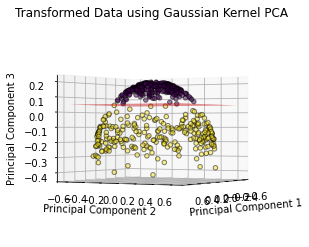

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Finalise my data
final_data =  kernel_pca(X, 3, 8) # Choose your own n_components and sigma here

# Plotting the projected data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(final_data[:, 0], final_data[:, 1], final_data[:, 2], c=y, cmap="viridis", edgecolor='k', alpha=0.5)

# Decision boundary
a = np.linspace(min(final_data[:, 0]), max(final_data[:, 0]), 10)
b = np.linspace(min(final_data[:, 1]), max(final_data[:, 1]), 10)
A, B = np.meshgrid(a, b)
Z = np.full_like(A, 0.05000000000000032) # Insert threshold

ax.plot_surface(A, B, Z, color = 'red', alpha=0.5)
ax.set_title('Transformed Data using Gaussian Kernel PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.view_init(elev=0, azim=30)
plt.show()